# KNNRW

NNRW + Multiple Kernel Learning

### Mercer 定理

任何半正定的函数都可以作为核函数。所谓半正定的函数f(xi,xj)，是指拥有训练数据集合（x1,x2,...xn)，我们定义一个矩阵的元素aij = f(xi,xj)，这个矩阵式n*n的，如果这个矩阵是半正定的，那么f(xi,xj)就称为半正定的函数。这个mercer定理不是核函数必要条件，只是一个充分条件，即还有不满足mercer定理的函数也可以是核函数

### The MKLpy library

MKL algorithms

    EasyMKL
    RM-GD
    R-MKL
    Average of kernels
    a meta-MKL-classifier used in multiclass problems according to one-vs-one pattern;

tools to operate over kernels, such as normalization, centering, summation, mean...;

metrics, such as kernel_alignment, radius...;

kernel functions, such as HPK (Homogeneous Polynomial Kernel) and boolean kernels (disjunctive, conjunctive, DNF, CNF).

# Kernel-NNRW

Multi-kernel learning. a1K1(x1,x2) + a2K2(x1,x2) + a3K3(x1,x2) + ...  s.t. a1 + a2 + ... = 1.0

In [40]:
# from pyNNRW.knnrw import *
%run ../src/pyNNRW/knnrw.py

## Kernel NNRW provides three flavors: 

### flavor = 'sum'

不包含权重或偏置参数的初始化，实为将原始特征转化为一个线性核变换(Gram Matrix)与若干非线性核变换的叠加，得到一个mxm的SumMatrix。模型本身为单层NN

### flavor = 'stack'

拼接为一个大矩阵 [Gram, rbf, sigmoid, ...]，尺寸为m x km。k为拼接的kernel数量

### flavor = 'sum + stack'

拼接为一个大矩阵 [SumMatrix, Gram, rbf, sigmoid, ...]，尺寸为m x (k+1)m。k为拼接的kernel数量

In [6]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel, cosine_similarity

x1 = np.array([[1,2],[3,4],[1,-2],[3,0]])
x2 = np.array([[-1,1],[3,2]])
print(x1.shape, x2.shape)

# 返回Gram Matrix: n维欧式空间中任意k个向量之间两两的内积所组成的矩阵，称为这k个向量的格拉姆矩阵(Gram matrix)
linear_kernel(x1,x2), rbf_kernel(x1,x2) # 维度 = [x1_rows, x2_rows]

(4, 2) (2, 2)


(array([[ 1.,  7.],
        [ 1., 17.],
        [-3., -1.],
        [-3.,  9.]]),
 array([[8.20849986e-02, 1.35335283e-01],
        [3.72665317e-06, 1.35335283e-01],
        [1.50343919e-03, 4.53999298e-05],
        [2.03468369e-04, 1.35335283e-01]]))

## 案例1：一维数据的回归问题

(158, 1) (40, 1) (158, 1) (40, 1)


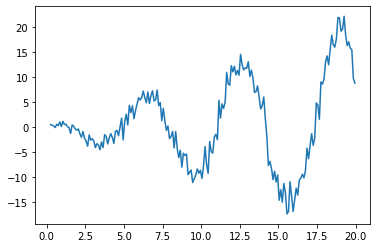

In [7]:
from sklearn.cluster import k_means
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# from elm import ELMClassifier, ELMRegressor, GenELMClassifier, GenELMRegressor
# from random_layer import RandomLayer, MLPRandomLayer, RBFRandomLayer, GRBFRandomLayer

def make_toy():
    x = np.arange(0.25,20,0.1)
    y = x*np.cos(x)+0.5*np.sqrt(x)*np.random.randn(x.shape[0])
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    return x, y

xtoy, ytoy = make_toy()
# xtoy, ytoy = stdsc.fit_transform(xtoy), stdsc.fit_transform(ytoy)
x_train, x_test, t_train, t_test = train_test_split(xtoy, ytoy, test_size=0.2)
plt.plot(xtoy, ytoy)
print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)

OMEGA shape:  (158, 158) , BETA shape:  (158, 1)
MSE on test set =  84.28497640137505


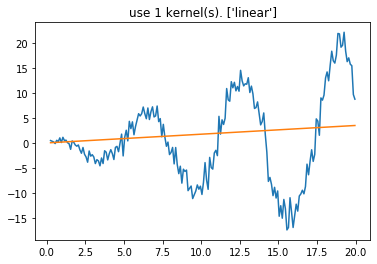

OMEGA shape:  (158, 316) , BETA shape:  (316, 1)
MSE on test set =  28.35939175674256


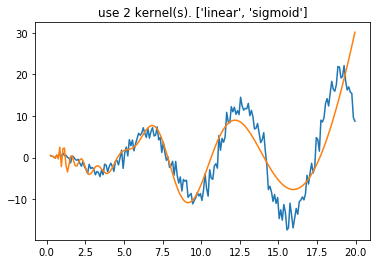

OMEGA shape:  (158, 474) , BETA shape:  (474, 1)
MSE on test set =  7.025721535229543


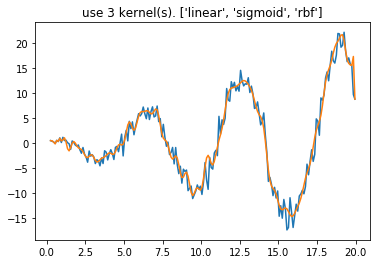

OMEGA shape:  (158, 632) , BETA shape:  (632, 1)
MSE on test set =  5.6778220434687


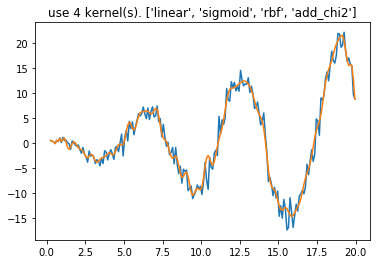

OMEGA shape:  (158, 790) , BETA shape:  (790, 1)
MSE on test set =  6.399195567707989


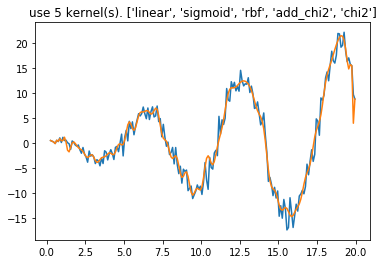

OMEGA shape:  (158, 948) , BETA shape:  (948, 1)
MSE on test set =  4.935522428014434


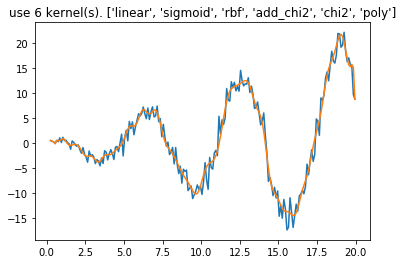

In [25]:
for k in range(1,7):

    clf = KNNRW(type='regression', kernels = k)
    clf.fit(x_train, t_train)
    t_pred = clf.predict(x_train, x_test) # knnrw requires the training set as an input parameter (anchors / landmarks of kernel operations)
    MSE = np.mean((t_test - t_pred)**2)
    print("MSE on test set = ", MSE)
    plt.plot(xtoy, ytoy, xtoy, clf.predict(x_train, xtoy))
    plt.title('use ' + str(k) + ' kernel(s). ' + str(clf.kernels) )
    plt.show()

## 案例2： Iris Dataset

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# ===============================
# Load dataset
# ===============================
iris = load_iris()
n_classes = len(set(iris.target))
x_train, x_test, t_train, t_test = train_test_split(iris.data, iris.target, test_size=0.2)

# ===============================
# Instantiate
# ===============================
clf = KNNRWClassifier(kernels = ['linear', "sigmoid" ])

# ===============================
# Training
# ===============================
clf.fit(x_train, t_train)
t_pred = clf.predict(x_train, x_train)
ACC = np.mean(t_train == t_pred)
print("ACC on training set = ", ACC)

# ===============================
# Validation
# ===============================
t_pred = clf.predict(x_train, x_test)
ACC = np.mean(t_test == t_pred)
print("ACC on test set = ", ACC)

the label must be reshaped before being transformed
OMEGA shape:  (120, 240) , BETA shape:  (240, 3)
ACC on training set =  0.95
ACC on test set =  0.9666666666666667


观察点：  
1. 由于没有类似于梯度下降的迭代过程，求解速度极快

## 案例3： MNIST

In [55]:
from tensorflow.keras.datasets import mnist
n_classes = 10
m = 800
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train[:m].astype(np.float32) / 255.
x_train = x_train[:m].reshape(-1, 28**2)
x_test = x_test[:m].astype(np.float32) / 255.
x_test = x_test[:m].reshape(-1, 28**2)
t_train = t_train[:m]
t_test = t_test[:m]

taccs = []
vaccs = []
    
# Perform a grid search
for flavor in ['sum','stack','stack+sum']:
    
    tacc = []
    vacc = []
    kernels = []
    
    for k in list(range(1, 7)) + [['linear','rbf'], ['linear','rbf','rbf'], ['linear','rbf','rbf','rbf'], ['linear','sigmoid','sigmoid'], ['linear','sigmoid','rbf','rbf'], ['linear','sigmoid','sigmoid','rbf']]: # hetero-kernel + homo-kernel modes
        
        # ===============================
        # Instantiate
        # ===============================
        clf = KNNRWClassifier(kernels = k, flavor = flavor)
    
        print('===== Flavor: ' + flavor + ', kernel = ' + str(clf.model.kernels) + ' =====')
        kernels.append( str(clf.model.kernels) )

        # ===============================
        # Training
        # ===============================
        clf.fit(x_train, t_train)
        t_pred = clf.predict(x_train, x_train)
        ACC = np.mean(t_train == t_pred)
        print("ACC on training set = ", ACC)
        tacc.append(ACC)

        # ===============================
        # Validation
        # ===============================
        t_pred = clf.predict(x_train, x_test)
        ACC = np.mean(t_test == t_pred)
        print("ACC on test set = ", ACC)
        vacc.append(ACC)
        
        print('========= \n\n')
        
    taccs.append(tacc)
    vaccs.append(vacc)
    


===== Flavor: sum, kernel = ['linear'] =====
OMEGA shape:  (800, 800) , BETA shape:  (800, 10)
ACC on training set =  0.14625
ACC on test set =  0.1


===== Flavor: sum, kernel = ['linear', 'sigmoid'] =====


C:\Users\eleve\Documents\codex\py\machine learning\source\18. pyNNRW\github\src\pyNNRW\knnrw.py:74: RuntimeWarning: overflow encountered in exp
  out = np.exp(x)
C:\Users\eleve\Documents\codex\py\machine learning\source\18. pyNNRW\github\src\pyNNRW\knnrw.py:75: RuntimeWarning: invalid value encountered in true_divide
  return out/ np.sum(out, axis=1, keepdims=True)


OMEGA shape:  (800, 800) , BETA shape:  (800, 10)
ACC on training set =  1.0
ACC on test set =  0.4675


===== Flavor: sum, kernel = ['linear', 'sigmoid', 'rbf'] =====
OMEGA shape:  (800, 800) , BETA shape:  (800, 10)
ACC on training set =  1.0
ACC on test set =  0.7175


===== Flavor: sum, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2'] =====
OMEGA shape:  (800, 800) , BETA shape:  (800, 10)
ACC on training set =  1.0
ACC on test set =  0.62625


===== Flavor: sum, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2', 'chi2'] =====
OMEGA shape:  (800, 800) , BETA shape:  (800, 10)
ACC on training set =  1.0
ACC on test set =  0.695


===== Flavor: sum, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2', 'chi2', 'poly'] =====
OMEGA shape:  (800, 800) , BETA shape:  (800, 10)
ACC on training set =  1.0
ACC on test set =  0.69875


===== Flavor: sum, kernel = ['linear', 'rbf'] =====
OMEGA shape:  (800, 800) , BETA shape:  (800, 10)
ACC on training set =  1.0
ACC on test set =  0.71625


====

C:\Users\eleve\Documents\codex\py\machine learning\source\18. pyNNRW\github\src\pyNNRW\knnrw.py:74: RuntimeWarning: overflow encountered in exp
  out = np.exp(x)
C:\Users\eleve\Documents\codex\py\machine learning\source\18. pyNNRW\github\src\pyNNRW\knnrw.py:75: RuntimeWarning: invalid value encountered in true_divide
  return out/ np.sum(out, axis=1, keepdims=True)


OMEGA shape:  (800, 1600) , BETA shape:  (1600, 10)
ACC on training set =  1.0
ACC on test set =  0.6375


===== Flavor: stack, kernel = ['linear', 'sigmoid', 'rbf'] =====
OMEGA shape:  (800, 2400) , BETA shape:  (2400, 10)
ACC on training set =  1.0
ACC on test set =  0.675


===== Flavor: stack, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2'] =====
OMEGA shape:  (800, 3200) , BETA shape:  (3200, 10)
ACC on training set =  1.0
ACC on test set =  0.58875


===== Flavor: stack, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2', 'chi2'] =====
OMEGA shape:  (800, 4000) , BETA shape:  (4000, 10)
ACC on training set =  1.0
ACC on test set =  0.66375


===== Flavor: stack, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2', 'chi2', 'poly'] =====
OMEGA shape:  (800, 4800) , BETA shape:  (4800, 10)
ACC on training set =  1.0
ACC on test set =  0.66375


===== Flavor: stack, kernel = ['linear', 'rbf'] =====
OMEGA shape:  (800, 1600) , BETA shape:  (1600, 10)
ACC on training set =  1.0
ACC on tes

C:\Users\eleve\Documents\codex\py\machine learning\source\18. pyNNRW\github\src\pyNNRW\knnrw.py:74: RuntimeWarning: overflow encountered in exp
  out = np.exp(x)
C:\Users\eleve\Documents\codex\py\machine learning\source\18. pyNNRW\github\src\pyNNRW\knnrw.py:75: RuntimeWarning: invalid value encountered in true_divide
  return out/ np.sum(out, axis=1, keepdims=True)


OMEGA shape:  (800, 2400) , BETA shape:  (2400, 10)
ACC on training set =  1.0
ACC on test set =  0.64375


===== Flavor: stack+sum, kernel = ['linear', 'sigmoid', 'rbf'] =====
OMEGA shape:  (800, 3200) , BETA shape:  (3200, 10)
ACC on training set =  1.0
ACC on test set =  0.6825


===== Flavor: stack+sum, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2'] =====
OMEGA shape:  (800, 4000) , BETA shape:  (4000, 10)
ACC on training set =  1.0
ACC on test set =  0.595


===== Flavor: stack+sum, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2', 'chi2'] =====
OMEGA shape:  (800, 4800) , BETA shape:  (4800, 10)
ACC on training set =  1.0
ACC on test set =  0.68


===== Flavor: stack+sum, kernel = ['linear', 'sigmoid', 'rbf', 'add_chi2', 'chi2', 'poly'] =====
OMEGA shape:  (800, 5600) , BETA shape:  (5600, 10)
ACC on training set =  1.0
ACC on test set =  0.68375


===== Flavor: stack+sum, kernel = ['linear', 'rbf'] =====
OMEGA shape:  (800, 2400) , BETA shape:  (2400, 10)
ACC on training set 

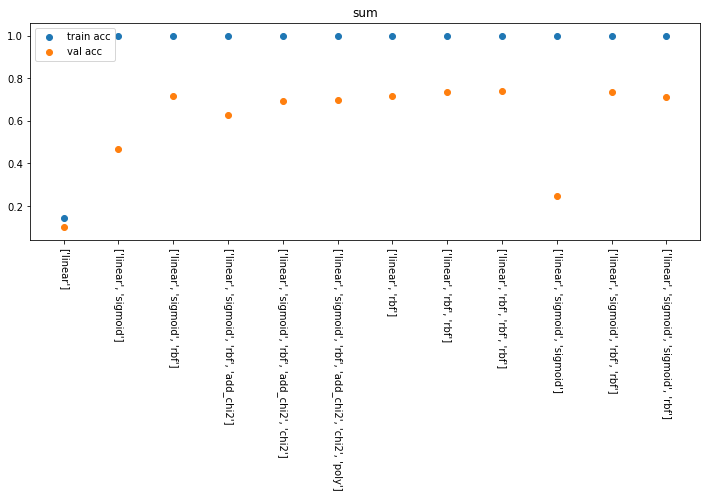

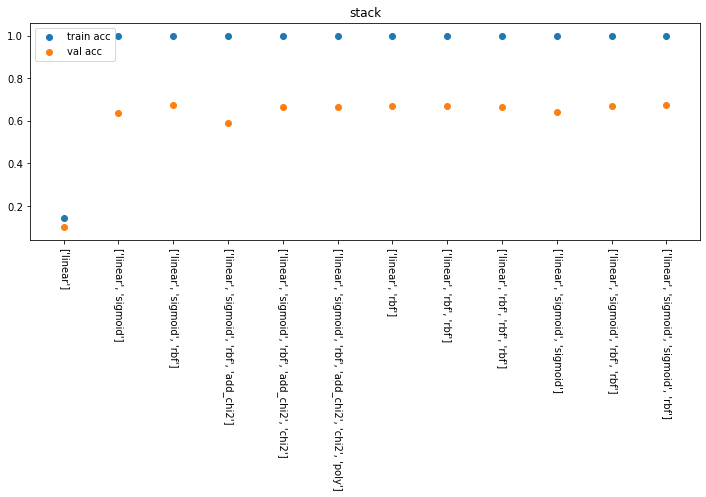

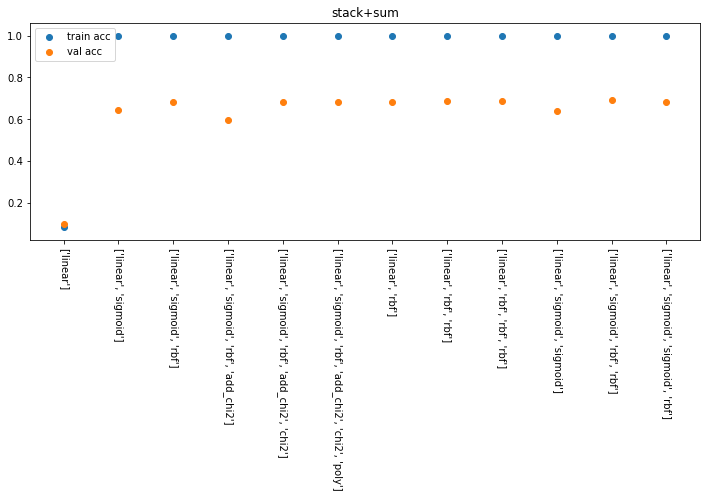

In [60]:
for i, flavor in enumerate(['sum','stack','stack+sum']):
    plt.figure(figsize = (12, 4))
    plt.title(flavor)
    plt.scatter(kernels, taccs[i], label = 'train acc')
    plt.scatter(kernels, vaccs[i], label = 'val acc')
    plt.legend()
    plt.xticks(rotation=-90)
    plt.show()

该数据上 overfit了